# Set 

In [1]:
import pickle
import networkx as nx
import pandas as pd

from scipy.sparse.linalg import eigsh

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

# Read the three toy network datasets

Read the three datasets to dictionary

In [2]:
A_dict=dict()
X_dict=dict()
Y_dict=dict()
for i in range(1,4):
    with open("hw4_p2_data/graph_{}_A.pkl".format(i), "rb") as A_f:
         A_dict["G_{0}".format(i)] = pickle.load(A_f)
    with open("hw4_p2_data/graph_{}_X.pkl".format(i), "rb") as X_f:
         X_dict["G_{0}".format(i)] = pickle.load(X_f)
    with open("hw4_p2_data/graph_{}_Y.pkl".format(i), "rb") as Y_f:
         Y_dict["G_{0}".format(i)] = pickle.load(Y_f)  

# Create dataframe for three graphs
## including X(attribute), Y(label), u_2, u_3

In [3]:
def generate_datasets(Graph, X_dict, Y_dict):
    """
    Return a pandas.dataframe,columns are ['attribute1','attribute2', 'u_2', 'u_3', 'label']

    INPUT:
    - ``Graph`` -- String, which graph, should be G_1 or G_2 or G_3
    - ``X_dict`` -- the dictionary of node attribute matrix X
    - ``Y_dict`` -- the dictionary of node labels Y
    OUTPUT:
    - ``result`` -- a pandas.dataframe
    - ``G`` -- NetworkX.graph
    """
    # Create graph from adjacency matrixs
    G = nx.from_numpy_matrix(A_dict[Graph])
    
    # Laplacian matrix
    L = nx.laplacian_matrix(G).todense()
    evals_small, evecs_small = eigsh(L,3,which='SM')
    
    # u_2, u_3 are the second and third smallest (in magnitude) eigenvectors of the Laplacian
    u_2 = evecs_small[:,1]
    u_3 = evecs_small[:,2]
    
    df = pd.DataFrame(X_dict[Graph]).rename(columns={0: "attribute1", 1: "attribute2"})
    df['u_2'] = u_2
    df['u_3'] = u_3
    df['label'] = Y_dict[Graph]
    
    return G, df

In [4]:
G_1, dataset_g1 = generate_datasets('G_1',X_dict,Y_dict)
G_2, dataset_g2 = generate_datasets('G_2',X_dict,Y_dict)
G_3, dataset_g3 = generate_datasets('G_3',X_dict,Y_dict)

# Plot one figure for each network dataset with 2 subplots

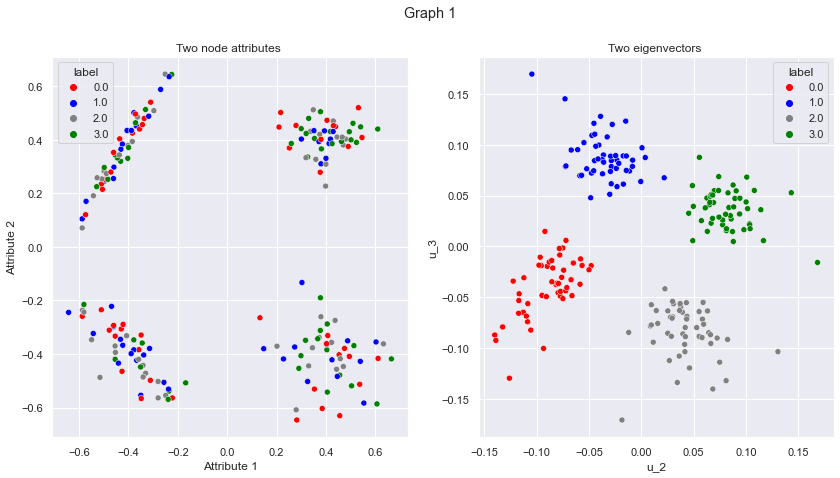

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
ax1 = sns.scatterplot(ax=ax1,data = dataset_g1,x='attribute1',y='attribute2',hue='label',palette=['red','blue','grey','green'])
ax2 = sns.scatterplot(ax=ax2,data=dataset_g1,x='u_2',y='u_3',hue='label',palette=['red','blue','grey','green'])
ax1.set(xlabel='Attribute 1', ylabel='Attribute 2', title = 'Two node attributes ')
ax2.set(xlabel='u_2', ylabel='u_3', title = 'Two eigenvectors ')
plt.suptitle('Graph 1')
plt.show()

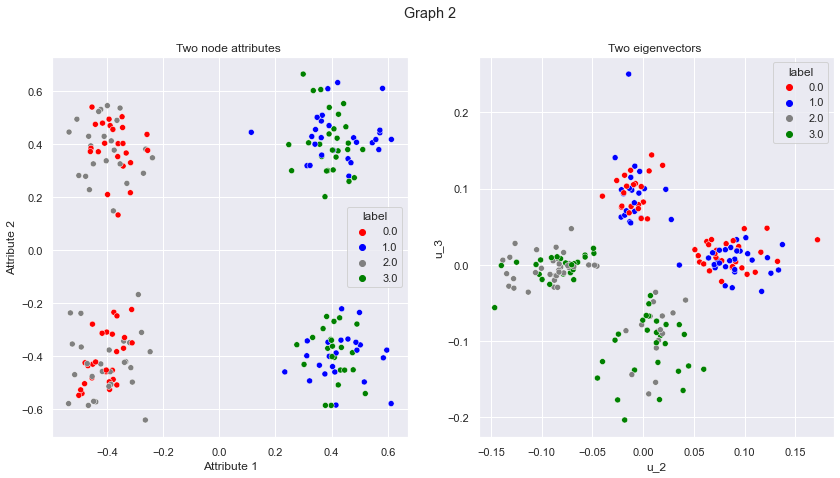

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
ax1 = sns.scatterplot(ax=ax1,data = dataset_g2,x='attribute1',y='attribute2',hue='label',palette=['red','blue','grey','green'])
ax2 = sns.scatterplot(ax=ax2,data=dataset_g2,x='u_2',y='u_3',hue='label',palette=['red','blue','grey','green'])
ax1.set(xlabel='Attribute 1', ylabel='Attribute 2', title = 'Two node attributes ')
ax2.set(xlabel='u_2', ylabel='u_3', title = 'Two eigenvectors ')
plt.suptitle('Graph 2')
plt.show()

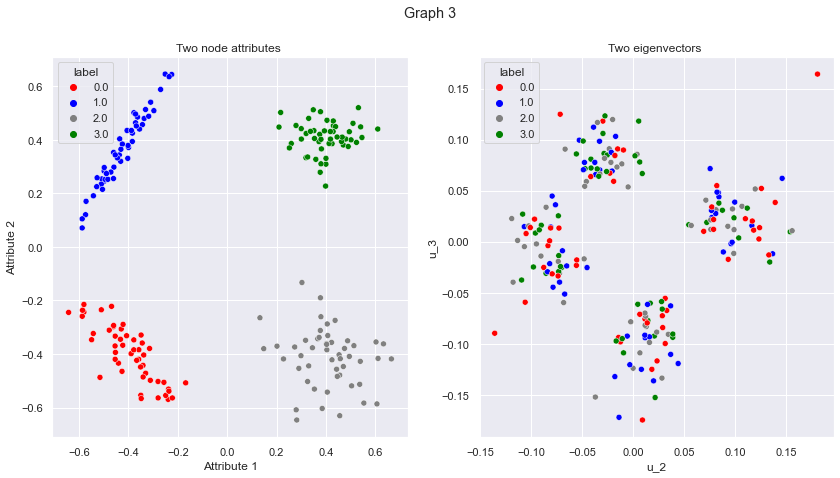

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
ax1 = sns.scatterplot(ax=ax1,data = dataset_g3,x='attribute1',y='attribute2',hue='label',palette=['red','blue','grey','green'])
ax2 = sns.scatterplot(ax=ax2,data=dataset_g3,x='u_2',y='u_3',hue='label',palette=['red','blue','grey','green'])
ax1.set(xlabel='Attribute 1', ylabel='Attribute 2', title = 'Two node attributes ')
ax2.set(xlabel='u_2', ylabel='u_3', title = 'Two eigenvectors ')
plt.suptitle('Graph 3')
plt.show()

# Visualize the network using the spectral and spring layouts.

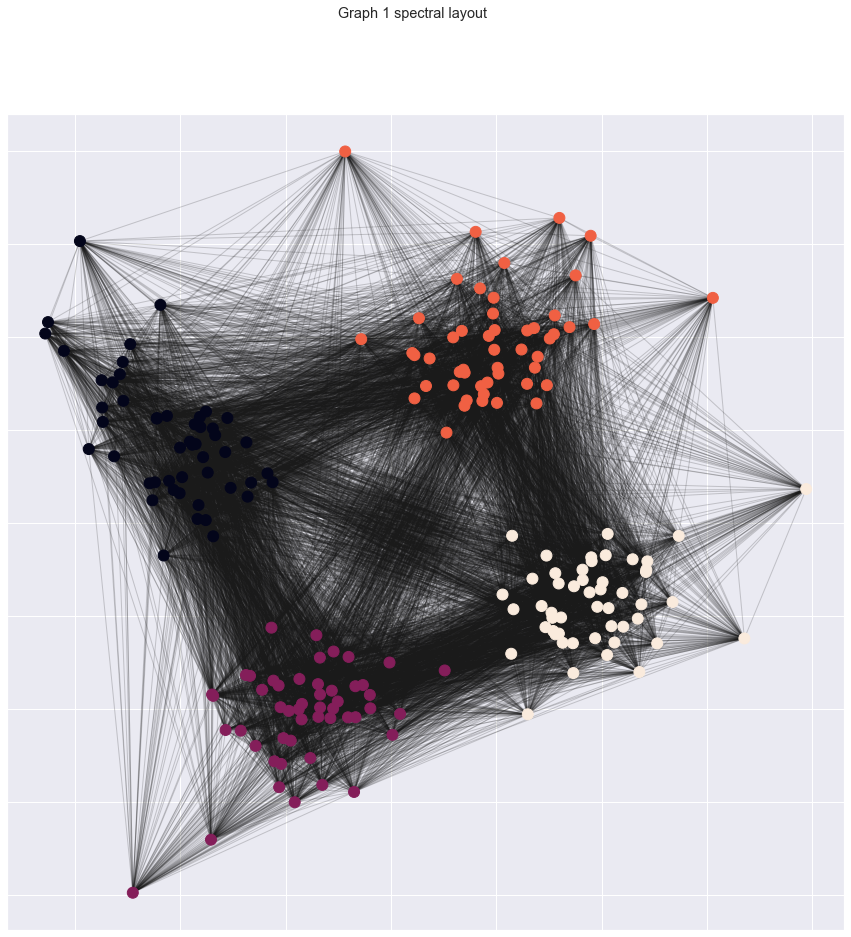

In [8]:
fig = plt.figure(figsize=(15,15))
pos_spectral = nx.spectral_layout(G_1)
nx.draw_networkx_nodes(G_1, pos_spectral, node_color=Y_dict['G_1'], node_size=120)
nx.draw_networkx_edges(G_1, pos_spectral, alpha=0.2)
plt.suptitle('Graph 1 spectral layout')
plt.show()

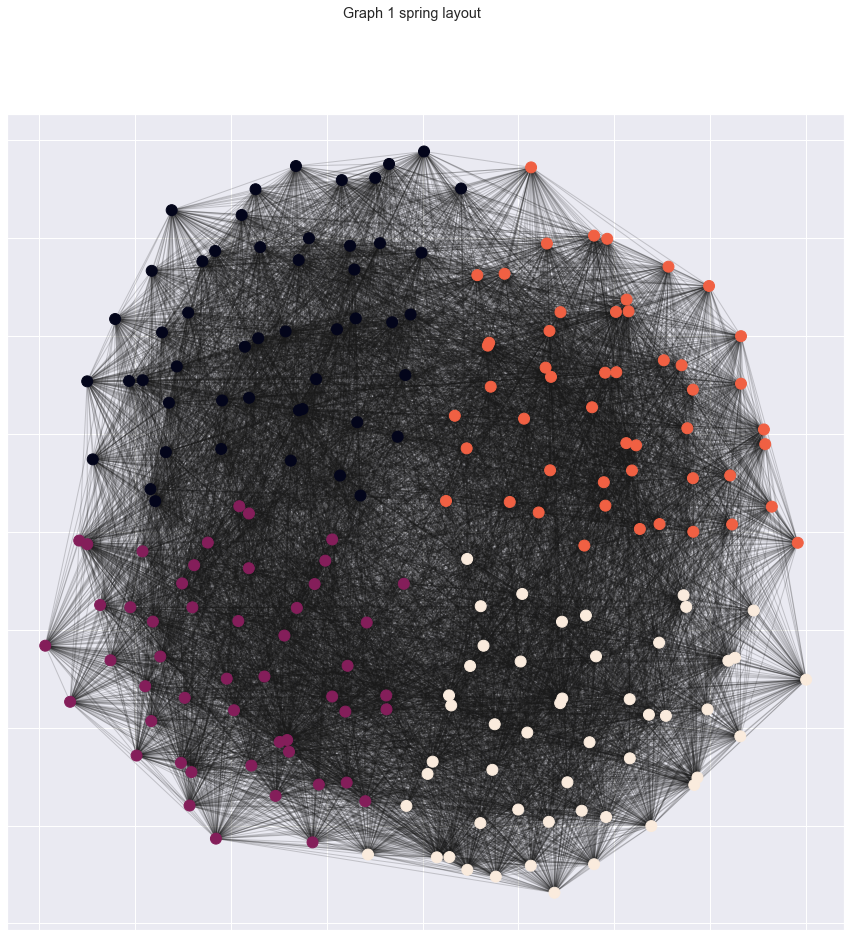

In [9]:
fig = plt.figure(figsize=(15,15))
pos_spring = nx.spring_layout(G_1)
nx.draw_networkx_nodes(G_1, pos_spring, node_color=Y_dict['G_1'], node_size=120)
nx.draw_networkx_edges(G_1, pos_spring, alpha=0.2)
plt.suptitle('Graph 1 spring layout')
plt.show()

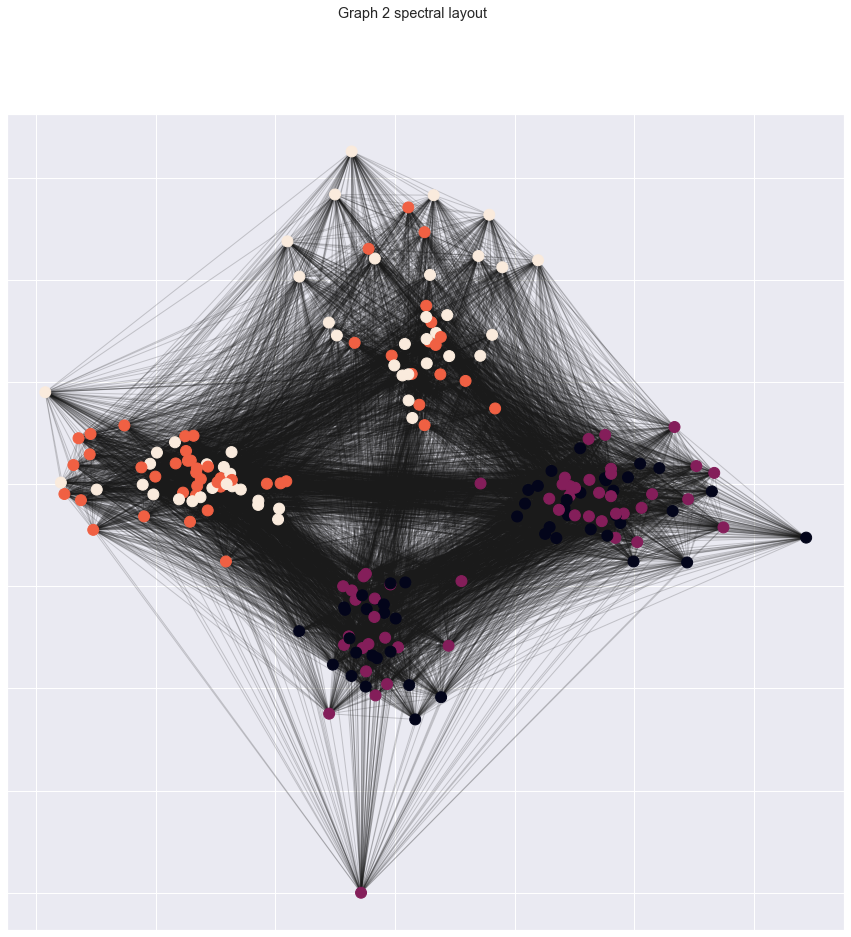

In [10]:
fig = plt.figure(figsize=(15,15))
pos_spectral = nx.spectral_layout(G_2)
nx.draw_networkx_nodes(G_2, pos_spectral, node_color=Y_dict['G_2'], node_size=120)
nx.draw_networkx_edges(G_2, pos_spectral, alpha=0.2)
plt.suptitle('Graph 2 spectral layout')
plt.show()

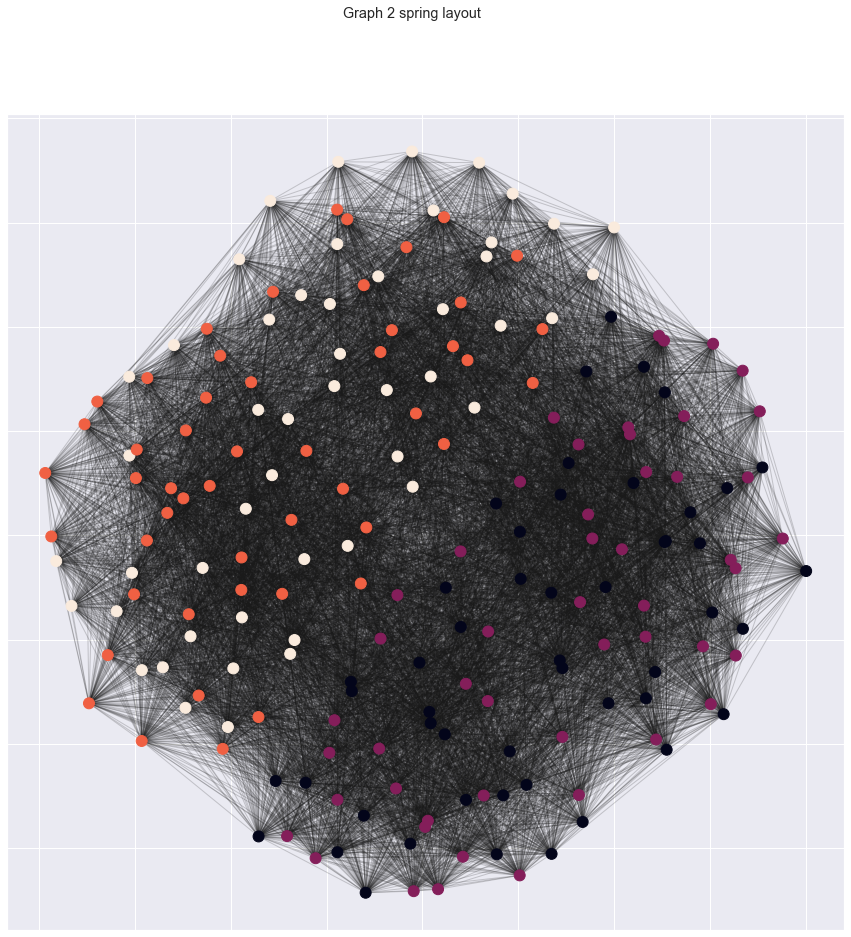

In [11]:
fig = plt.figure(figsize=(15,15))
pos_spring = nx.spring_layout(G_2)
nx.draw_networkx_nodes(G_2, pos_spring, node_color=Y_dict['G_2'], node_size=120)
nx.draw_networkx_edges(G_2, pos_spring, alpha=0.2)
plt.suptitle('Graph 2 spring layout')
plt.show()

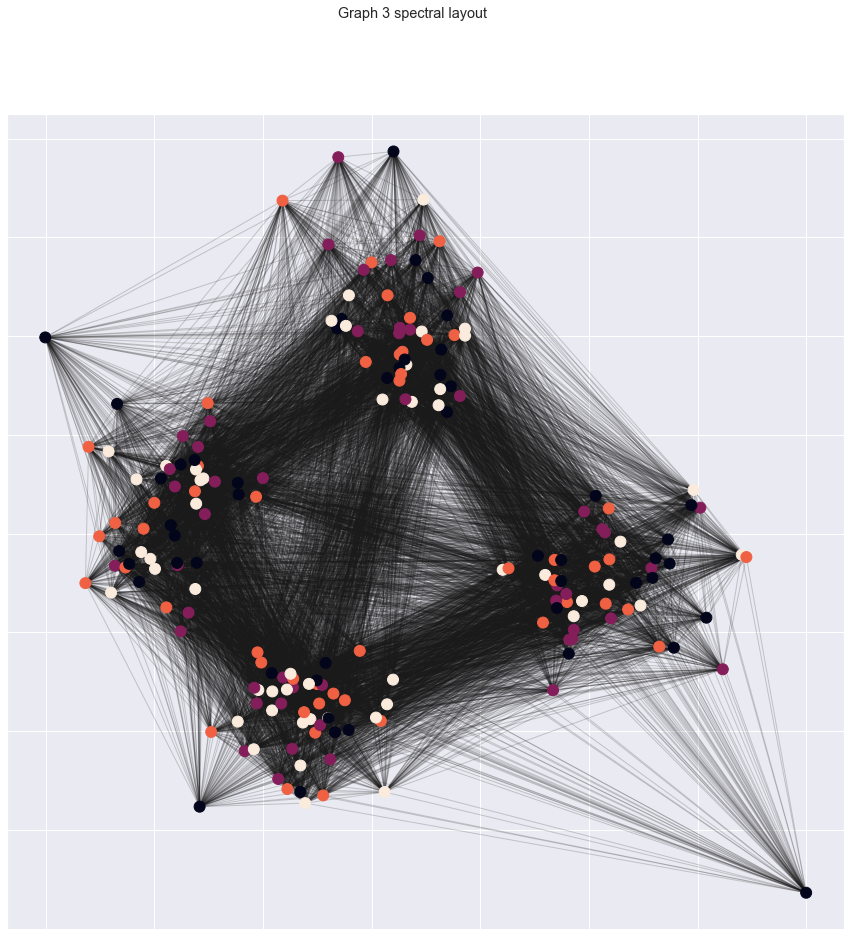

In [12]:
fig = plt.figure(figsize=(15,15))
pos_spectral = nx.spectral_layout(G_3)
nx.draw_networkx_nodes(G_3, pos_spectral, node_color=Y_dict['G_3'], node_size=120)
nx.draw_networkx_edges(G_3, pos_spectral, alpha=0.2)
plt.suptitle('Graph 3 spectral layout')
plt.show()

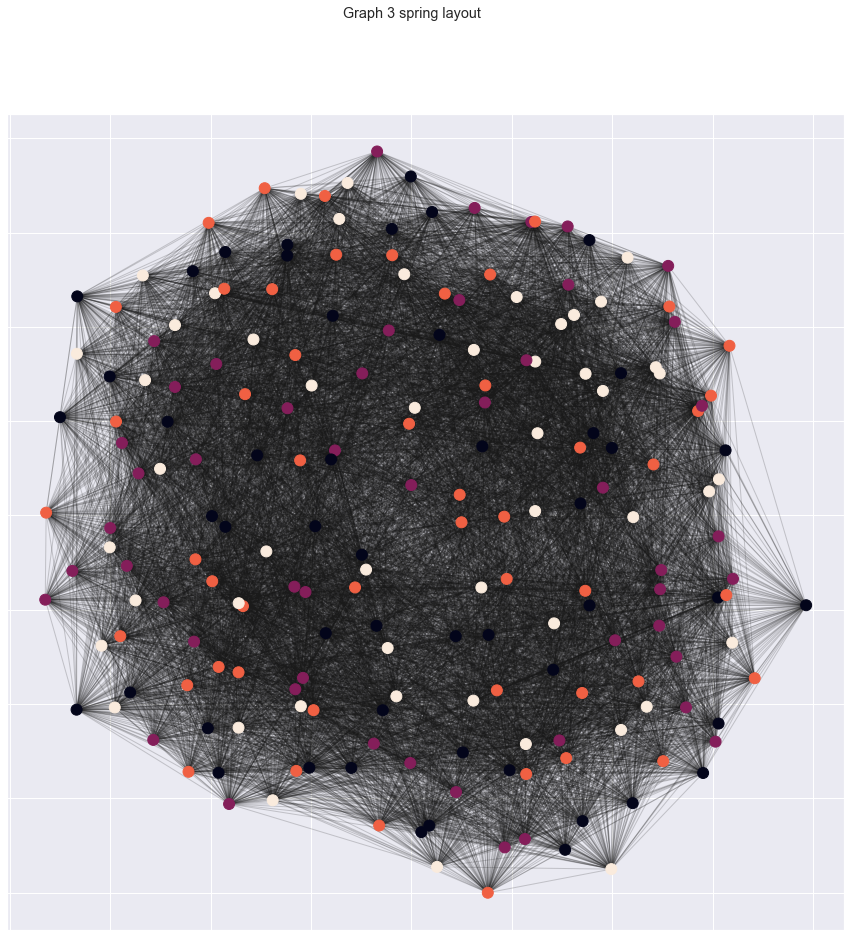

In [13]:
fig = plt.figure(figsize=(15,15))
pos_spring = nx.spring_layout(G_3)
nx.draw_networkx_nodes(G_3, pos_spring, node_color=Y_dict['G_3'], node_size=120)
nx.draw_networkx_edges(G_3, pos_spring, alpha=0.2)
plt.suptitle('Graph 3 spring layout')
plt.show()

# Random Forest Classifier

In [14]:
def RF_classifier_comparsion(dataset, features):
    """
    Return a numpy.float64,classifier accuracy

    INPUT:
    - ``dataset`` -- Dataframe, dataset
    - ``features`` -- List, features
    OUTPUT:
    - ``result`` -- numpy.float64,classifier accuracy
    """
    X = dataset[features]
    y = dataset['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    classifier = RandomForestClassifier(n_estimators=30, random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    result = metrics.accuracy_score(y_test, y_pred)
    
    return result

In [15]:
accuracy_dict_g1 = {}
accuracy_dict_g1['u_2'] = RF_classifier_comparsion(dataset_g1,['u_2'])
accuracy_dict_g1['u_3'] = RF_classifier_comparsion(dataset_g1,['u_2'])
accuracy_dict_g1['u_2 & u_3'] = RF_classifier_comparsion(dataset_g1,['u_2','u_3'])
accuracy_dict_g1['X'] = RF_classifier_comparsion(dataset_g1,['attribute1','attribute2'])
accuracy_dict_g1['X & u_2 & u_3'] = RF_classifier_comparsion(dataset_g1,['attribute1','attribute2','u_2','u_3'])
accuracy_dict_g1

{'u_2': 0.825,
 'u_3': 0.825,
 'u_2 & u_3': 0.9916666666666667,
 'X': 0.23333333333333334,
 'X & u_2 & u_3': 0.9916666666666667}

In [16]:
accuracy_dict_g2 = {}
accuracy_dict_g2['u_2'] = RF_classifier_comparsion(dataset_g2,['u_2'])
accuracy_dict_g2['u_3'] = RF_classifier_comparsion(dataset_g2,['u_2'])
accuracy_dict_g2['u_2 & u_3'] = RF_classifier_comparsion(dataset_g2,['u_2','u_3'])
accuracy_dict_g2['X'] = RF_classifier_comparsion(dataset_g2,['attribute1','attribute2'])
accuracy_dict_g2['X & u_2 & u_3'] = RF_classifier_comparsion(dataset_g2,['attribute1','attribute2','u_2','u_3'])
accuracy_dict_g2

{'u_2': 0.44166666666666665,
 'u_3': 0.44166666666666665,
 'u_2 & u_3': 0.4666666666666667,
 'X': 0.48333333333333334,
 'X & u_2 & u_3': 0.9916666666666667}

In [17]:
accuracy_dict_g3 = {}
accuracy_dict_g3['u_2'] = RF_classifier_comparsion(dataset_g3,['u_2'])
accuracy_dict_g3['u_3'] = RF_classifier_comparsion(dataset_g3,['u_2'])
accuracy_dict_g3['u_2 & u_3'] = RF_classifier_comparsion(dataset_g3,['u_2','u_3'])
accuracy_dict_g3['X'] = RF_classifier_comparsion(dataset_g3,['attribute1','attribute2'])
accuracy_dict_g3['X & u_2 & u_3'] = RF_classifier_comparsion(dataset_g3,['attribute1','attribute2','u_2','u_3'])
accuracy_dict_g3

{'u_2': 0.23333333333333334,
 'u_3': 0.23333333333333334,
 'u_2 & u_3': 0.25,
 'X': 1.0,
 'X & u_2 & u_3': 1.0}

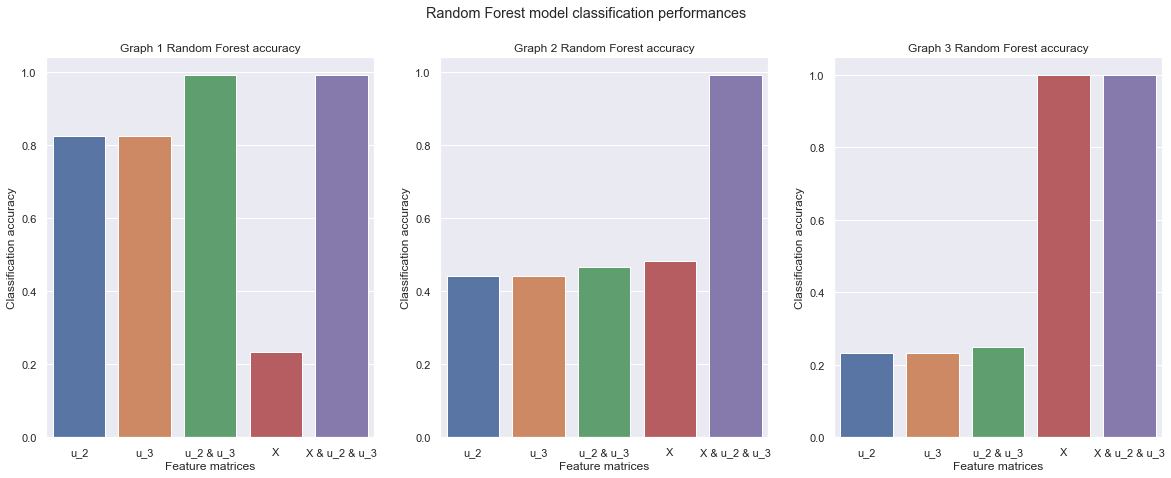

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,7))

ax1 = sns.barplot(ax=ax1, x=list(accuracy_dict_g1.keys()), y=list(accuracy_dict_g1.values()))
ax2 = sns.barplot(ax=ax2, x=list(accuracy_dict_g2.keys()), y=list(accuracy_dict_g2.values()))
ax3 = sns.barplot(ax=ax3, x=list(accuracy_dict_g3.keys()), y=list(accuracy_dict_g3.values()))

ax1.set(xlabel='Feature matrices', ylabel='Classification accuracy', title = 'Graph 1 Random Forest accuracy')
ax2.set(xlabel='Feature matrices', ylabel='Classification accuracy', title = 'Graph 2 Random Forest accuracy')
ax3.set(xlabel='Feature matrices', ylabel='Classification accuracy', title = 'Graph 3 Random Forest accuracy')
plt.suptitle('Random Forest model classification performances')
plt.show()